# Basics

This notebook is designed to document some simple examples of ALP propagation problems to show how to use ALPRO. We'll also take a look at some of the classes used, and what needs to be initialised. In the other tutorials, there are more details on setting up your own models.   

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
import alpro 
alpro.util.set_default_plot_params()

The top-level class that is used to interface with photon ALP conversion calculations is the "Survival" class. Any model is initialised through a call like this:

In [2]:
s = alpro.Survival()

The ALP parameters are set using the set_params method

In [3]:
s.set_params(g = 1e-13 * 1e-9, mass = 1e-13, invgev = False)

We can print out what is contained in the survival class at this stage. 

In [4]:
for k,v in vars(s).items(): 
    print ("{:20s}  {}".format(k,v))

model                 None
coherence_func        None
available_models      ['1821', '1275a', '1275b', 'custom', 'file', 'uniform', 'libanov', None]
get_P                 CPUDispatcher(<function get_P at 0x12b6e67a0>)
pol_matrix_bool       False
g_a                   1e-22
mass                  1e-13


At this stage, we haven't really initialised anything in the model, and we minimally need a correctly set up domain class which stores the magentic field and density profile used as input to the ALP calculation. A simple way of getting this set up is to use one of the inbuild models, which you can see using the following command. We can pick one of those and see that the domain is now populated. 

In [5]:
s.show_available_models()

['1821', '1275a', '1275b', 'custom', 'file', 'uniform', 'libanov', None]


In [6]:
s = alpro.Survival("uniform")
s.setup_regular_model(B = 1e-5, L = 10.0, ne = 0.0, N = 1, phi = 0.0)

for k,v in vars(s.domain).items(): 
    print ("{:20s}  {}".format(k,v))

profile               None
beta                  100
coherence_r0          None
Bz                    1.0
r                     [0.]
deltaL                [10.]
rcen                  [5.]
ne                    [0.]
phi                   [0.]
B                     [1.e-05]


[]

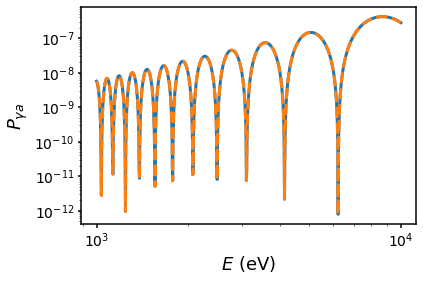

In [8]:
s.set_params(g = 1e-12 * 1e-9, mass = 1e-11)
energies = np.logspace(3,4,1000)
s.propagate(energies=energies, pol="y")
fig = s.default_plot(theory = s.analytic_pga)
plt.semilogy()